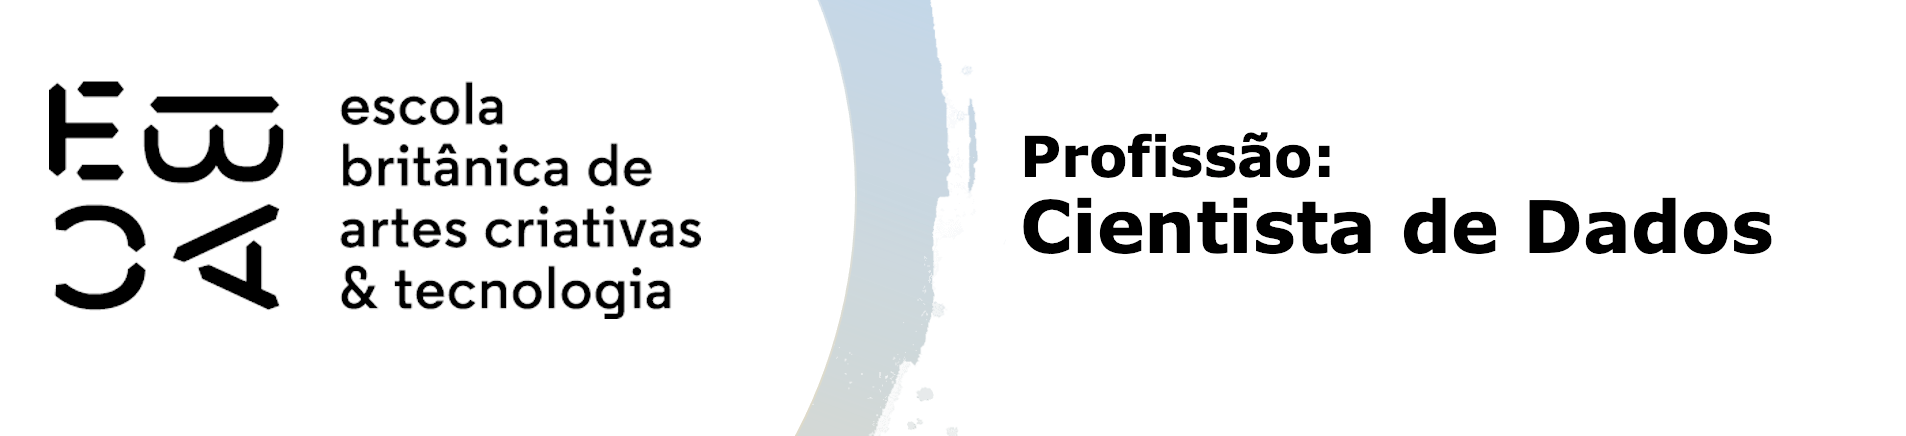

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
peng = sns.load_dataset('penguins')
peng.index.name = 'id'
peng_quant = peng.select_dtypes(include = 'number').dropna()

In [3]:
peng_quant.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [5]:
peng_pad = StandardScaler().fit_transform(peng_quant)

In [6]:
clus = AgglomerativeClustering(linkage = 'complete' ,
                              distance_threshold= None ,
                              n_clusters = 3)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [7]:
peng_quant['grupo'] = clus.labels_
penguins = peng.merge(peng_quant['grupo'] , on = 'id' , how = 'left')

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


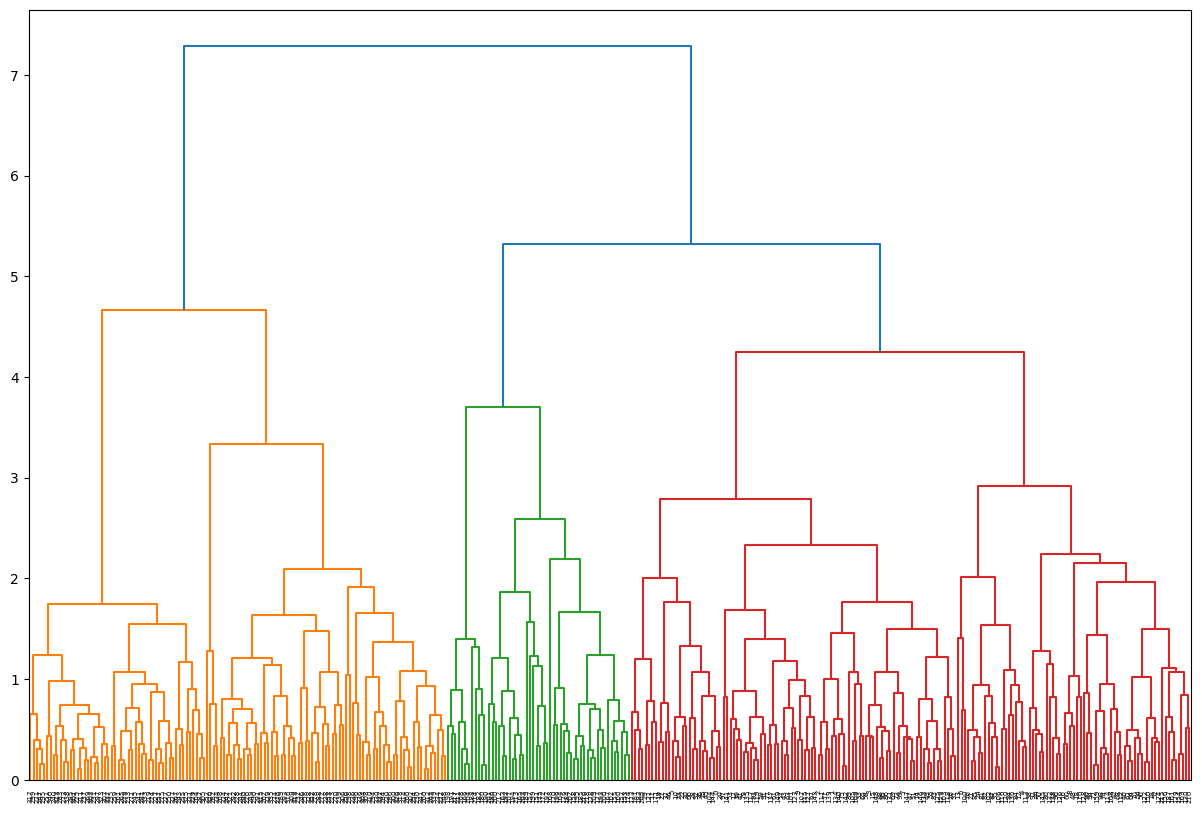

In [9]:
plt.figure(figsize=(15, 10))
dend = shc.dendrogram(shc.linkage(peng_pad , method = 'complete'))

plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [10]:
contagem = pd.DataFrame(penguins.grupo.value_counts())

In [11]:
contagem['especie'] = {1 : 'Adelie' , 2 : 'Chinstrap' , 0 : 'Gentoo'}
contagem

,count,especie
grupo,,
1.0,165,Adelie
0.0,123,Gentoo
2.0,54,Chinstrap


In [12]:
pd.crosstab(penguins.species , penguins.grupo)

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


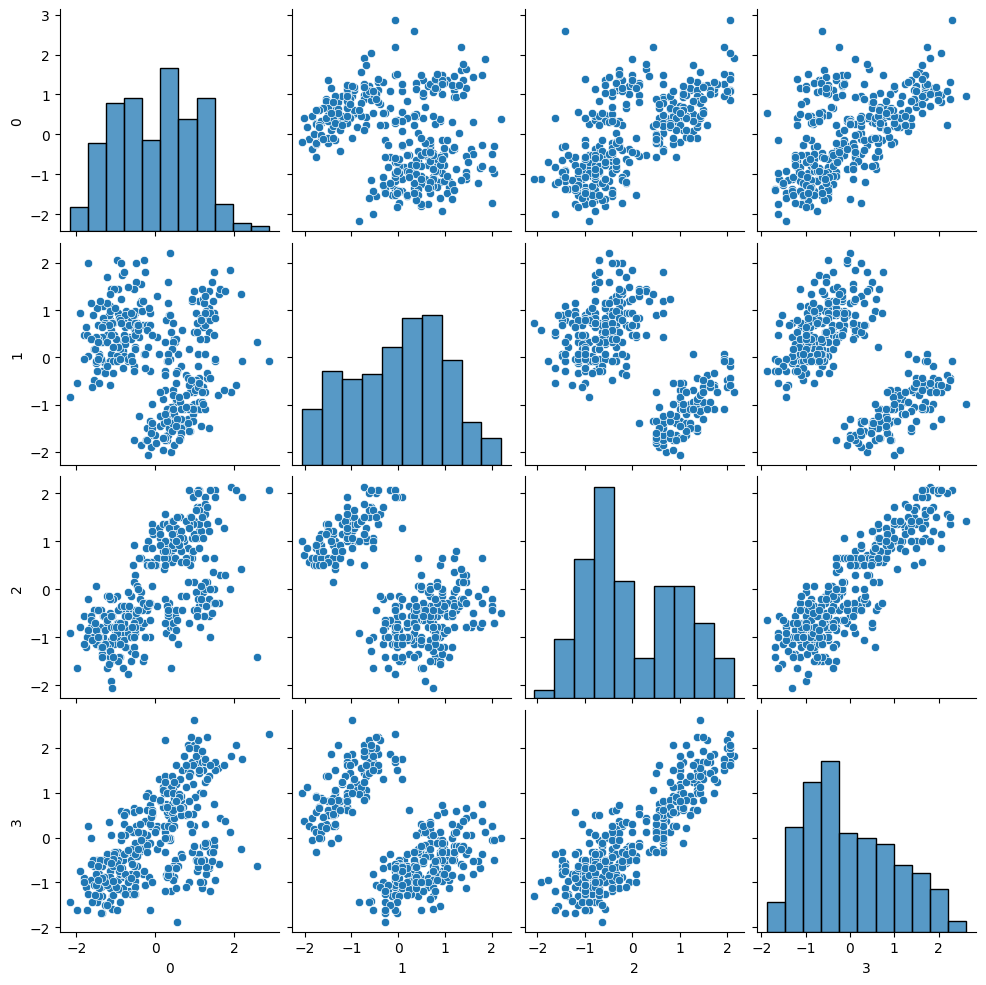

In [39]:
sns.pairplot(pd.DataFrame(peng_pad))

In [21]:
peng_quant.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.798246
std,5.459584,1.974793,14.061714,801.954536,0.691547
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [36]:
clus = AgglomerativeClustering(linkage = 'complete' ,
                              distance_threshold= None ,
                              n_clusters = 5)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [42]:
peng_quant['grupo2'] = clus.labels_
penguins = peng.merge(peng_quant['grupo2'] , on = 'id' , how = 'left')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo2
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,4.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,4.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,4.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,4.0


In [106]:
print('Contagem de pinguins por grupos')
pd.DataFrame(penguins.grupo2.value_counts())

Contagem de pinguins por grupos


,count
grupo2,
4.0,96
1.0,71
2.0,69
0.0,54
3.0,52


In [114]:
print('Contagem de pinguins de cada sexo por grupo')
pd.crosstab(penguins.grupo2 , penguins.sex)

Contagem de pinguins de cada sexo por grupo


sex,Female,Male
grupo2,,
0.0,20,34
1.0,9,61
2.0,13,55
3.0,49,0
4.0,74,18


In [125]:
pd.DataFrame(penguins.groupby('grupo2')['island'].value_counts())

count
grupo2 island          
0.0    Dream         54
1.0    Biscoe        71
2.0    Dream         29
       Torgersen     23
       Biscoe        17
3.0    Biscoe        52
4.0    Dream         41
       Torgersen     28
       Biscoe        27

A tabela sugere que cada grupo de pinguins (grupo2) tem uma distribuição específica nas diferentes ilhas (island). Por exemplo:
- O grupo 0.0 está mais concentrado na ilha Dream (54 pinguins).
- O grupo 1.0 está predominantemente em Biscoe (71 pinguins).
- O grupo 2.0 tem uma distribuição mais variada, com pinguins em Dream, Torgersen, e alguns em Biscoe.

Esses padrões de distribuição geográfica podem ser interpretados como características distintas de cada grupo, sugerindo que existem preferências ou condições ambientais nas ilhas que influenciam a formação desses grupos.